# Polynomial Regression

In [1]:
import numpy as np

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0],  X_poly[0]

(array([-0.56092971]), array([-0.56092971,  0.31464214]))

In [2]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.73959052]), array([[0.9895044 , 0.55623492]]))

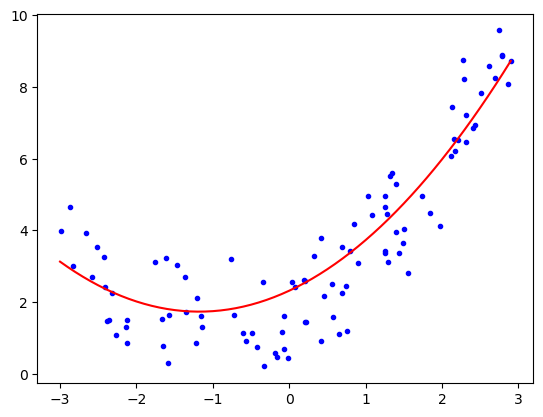

In [3]:
import matplotlib.pyplot as plt

X_new = x = np.arange(-3, 3, 0.1)
y_predict = 0.42 * np.power(X_new, 2) + 0.99 * X_new + 2.32
plt.plot(X, y, 'b.')
plt.plot(X_new, y_predict, 'r')
plt.show()

Learning Curves

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(labels=['train','val'])
    plt.xlabel('Train set size')
    plt.ylabel('RMSE')

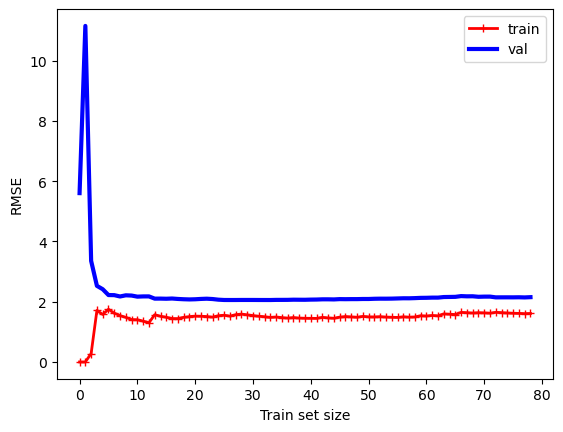

In [5]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

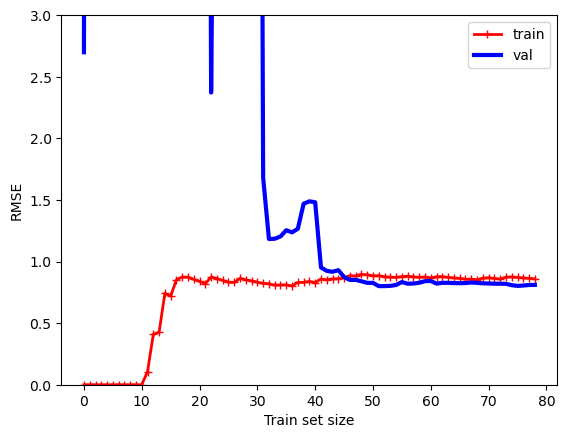

In [8]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plt.ylim((0, 3))
plot_learning_curves(polynomial_regression, X, y)

In [9]:
c
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.82970721]])

In [11]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.8020177])